analyze_chr_i(i) - i - индекс хромосомы с 0
строит графики:
- матрица расстояний, сгенерированная из pdb кривой (хитмап)
- плотность распределения количества бинов в зависимости от расстояния между ними (в мм)
- наблюдаемое значение hic в зависимости от расстояния между бинами,
BUCKETS_CNT - расмматриваем пары бинов, попадающие в один бакет по расстоянию между ними.
Внутри бакета значения hic усредняются и строится гистограмма.
Длина в мм одного бакета max(dist) - min(dist) / BUCKETS_CNT соответственно
- основной график анализа хромосомы.
Отлогарифмированный предыдущий график, зависимость ln(hic) от ln(dist), к нему применяется
линейная регрессия, после этого можно узнать коэффициенты зависимости между
hic и матрицей расстояний, сгенерированной из pdb файла

Предполагаемая зависимость
DIST[i][j] = 1 / HIC[i][j]^factor
factor = k^-1
i, j - любая пара бинов

Некоторые программы по типу 3DMax уже выдают оптимальный factor, с которым строилась кривая в pdb,
этот график также позволяет сравнить их распределение с заявленным

Также на этом графике прозрачным нарисована плотность распределения (координаты xs были отлогарифмированы для удобства
наложения графиков)

In [104]:
from main import analyze_chr_i

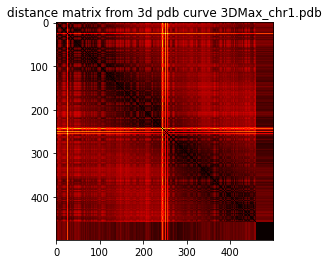

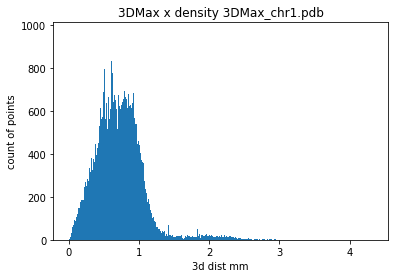

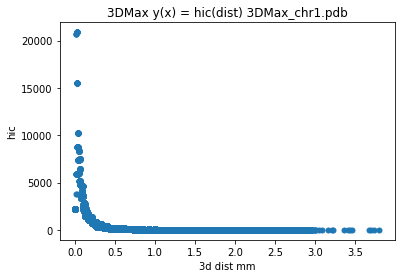

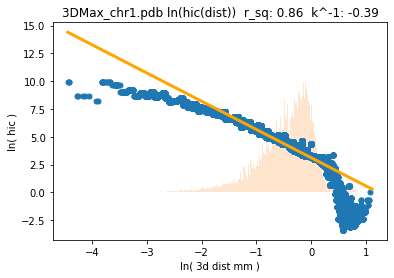

In [105]:
analyze_chr_i(0, file_name='3DMax_chr1.pdb')

В logs/analyzer.log можно посмотреть подробную информацию по анализу.
Основная продублирована на графиках (в тайтле), например factor, то есть k^-1, его можно сравнить с тем оптимальным factor,
что выдает 3DMax.
Например, для первого запуска 3DMax искал оптимальный factor с [0.1, 2.0] с шагом 0.1 и заявил, что
оптимальный 0.30

Во время выполнения analyze_chr_i координаты из pdb домножаются так, чтобы длина последовательности
соответствовала реальной (в bp) - хитмапы матрицы расстояний отрисовываются с учетом этого
(легко сравнивать разные программы)
в scaled_pdb_files лежат pdb в правильном размере (todo: не доделан парсер по размеру точки, чтобы рисовало
нужно заменять последний 2 столбца, пока что делаю это руками)

в PDBUtils есть функции для перевода bp в мм и обратно

In [106]:
from PDBUtils import mm_to_bp, bp_to_mm

In [107]:
mm_to_bp(85)

249857083

In [108]:
bp_to_mm(138394717)

47.08111853772344

Коэффициент для перевода был получен с помощью скрипта data/mm_bp_corr.py, сами данные взяты из википедии
https://en.wikipedia.org/wiki/Human_genome
и продублированны
в data/mm_to_bp_wiki.txt

во время анализа же использую данные о длине bp из cool файла (длины там немного отличаются)
см. Cooler Api
https://cooler.readthedocs.io/en/latest/api.html

HiCExtractor - удобная обертка для получения нужных мне данных из Cooler API
chr_i_hic - получает нужные сведения об i'й хромосоме, а именно
- hic матрицу
- количество бинов
- длину генома в bp

In [109]:
from HiCExtractor import chr_i_hic

In [110]:
hic, bins_cnt, bp = chr_i_hic(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=0)


Проделаем то же самое для 2й хромосомы, но для начала сгенерируем hic в удобном для 3DMax формате

In [111]:
from HiCExtractor import chr_i_hic_to_txt_adj

In [112]:
chr_i_hic_to_txt_adj(filepath='chr/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool', i=1)


Проанализируем 2ю хромосму:

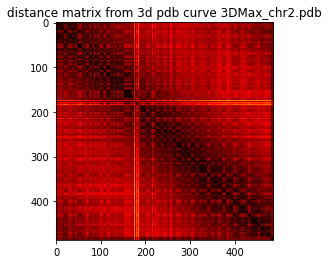

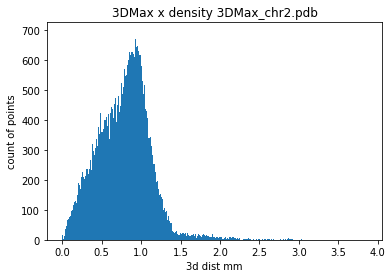

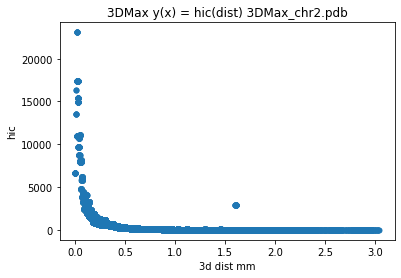

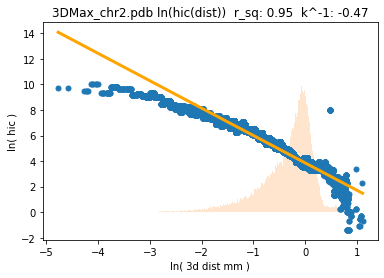

In [113]:
analyze_chr_i(1, file_name='3DMax_chr2.pdb')

Запуск в 3DMax для генерации pdb:
Оптимальное значение factor, выданное 3DMax в логах 0.3,
Количество итераций было поставлено на 1000

2ю хромосому с теми же параметрами, посмотрим, насколько 3DMax генерирует разные кривые на одном входе

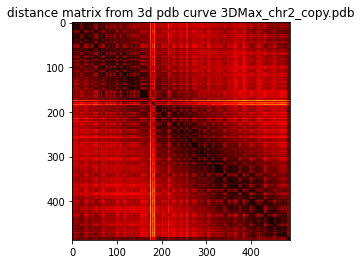

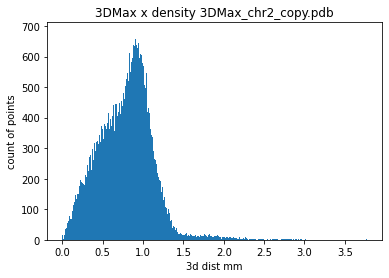

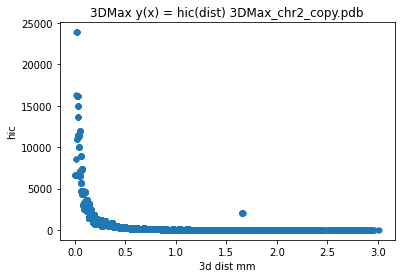

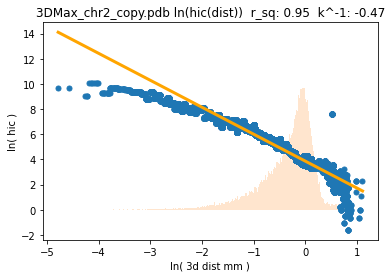

In [114]:
analyze_chr_i(1, file_name='3DMax_chr2_copy.pdb')

2ю хромосому, но с большим числом итераций в 3DMax
Проделаем то же самое, но сгенерируем pdb используя 10000 итераций, посмотрим насколько программа устойчива,
из логов узнаем, что 3DMax подобрал factor = 0.3 

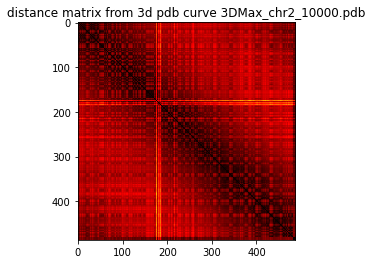

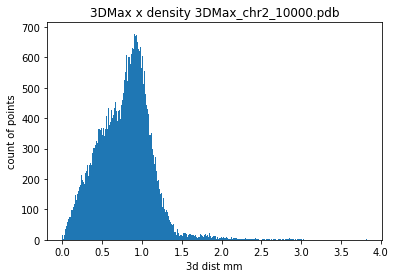

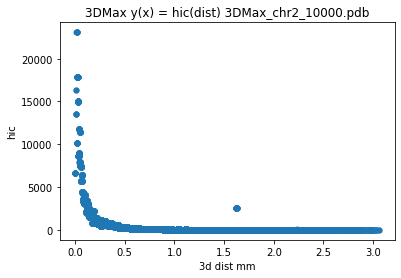

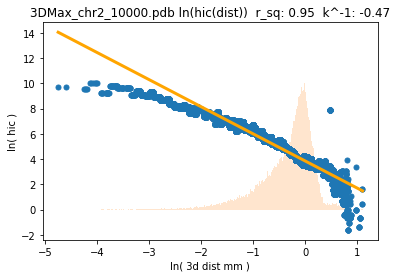

In [115]:
analyze_chr_i(1, file_name='3DMax_chr2_10000.pdb')

2ю хромосому с уже задананным в 3DMax factor = 1.2, iters = 1000

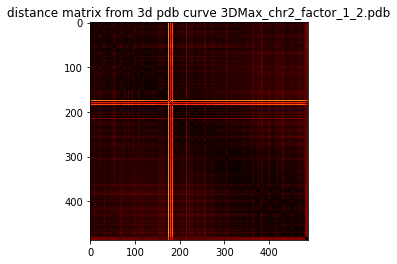

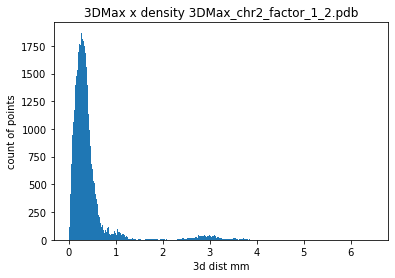

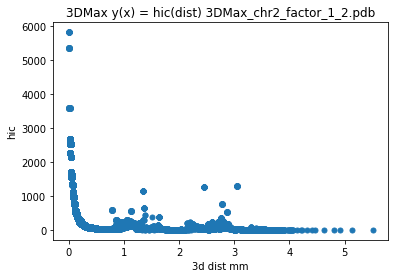

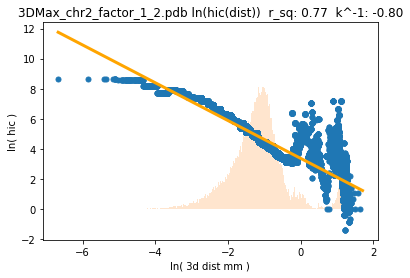

In [116]:
analyze_chr_i(1, file_name='3DMax_chr2_factor_1_2.pdb')

Проанализируем 3ю хромосому
best factor: 0.3 (0.3 на этом этапе стабильно выдается для всех хромосом) по мнению 3DMax


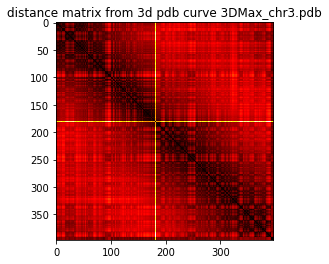

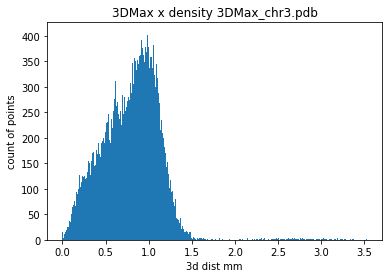

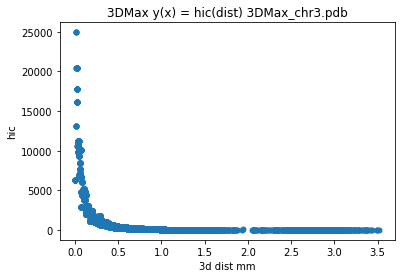

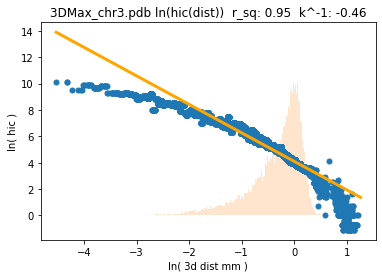

In [117]:
analyze_chr_i(2, file_name='3DMax_chr3.pdb')


первая хросома Simba3d
simba3d -r tasks/taskChr2.json для запуска из терминала
получившийся json в pdb через simba3d_make_pdb.py (в parameters передать путь к json)

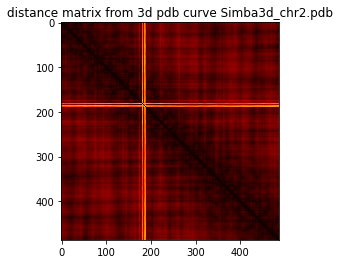

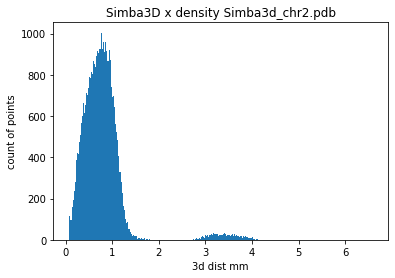

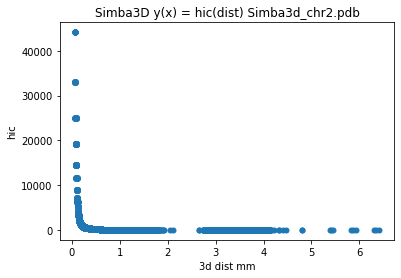

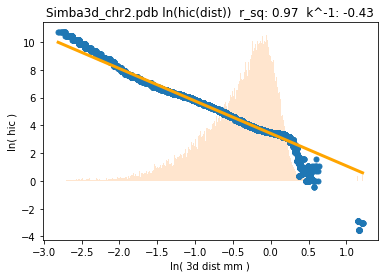

In [118]:
analyze_chr_i(1, SOFT_NAME='Simba3D', file_name='Simba3d_chr2.pdb')